In [1]:
# Import any needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###Back-of-the-envelope calculations for δ13C concentration in:
### Atmosphere, Biosphere and *Ocean*
δ13C fluctuates in the Earth system as an indicator of the biosphere’s process of inhaling and exhaling CO2. I would expect to observe the same CO2 El Niño rhythm in the δ13C fluctuation. This rhythm go high and low like a music 🎶🎵🎶🎵🎶🎵🎶  and repeated in annual and interannual patterns. The general expected trend is to lower the atmospheric value of δ13C.

As a begin, here a back of envelope modeling of the system.





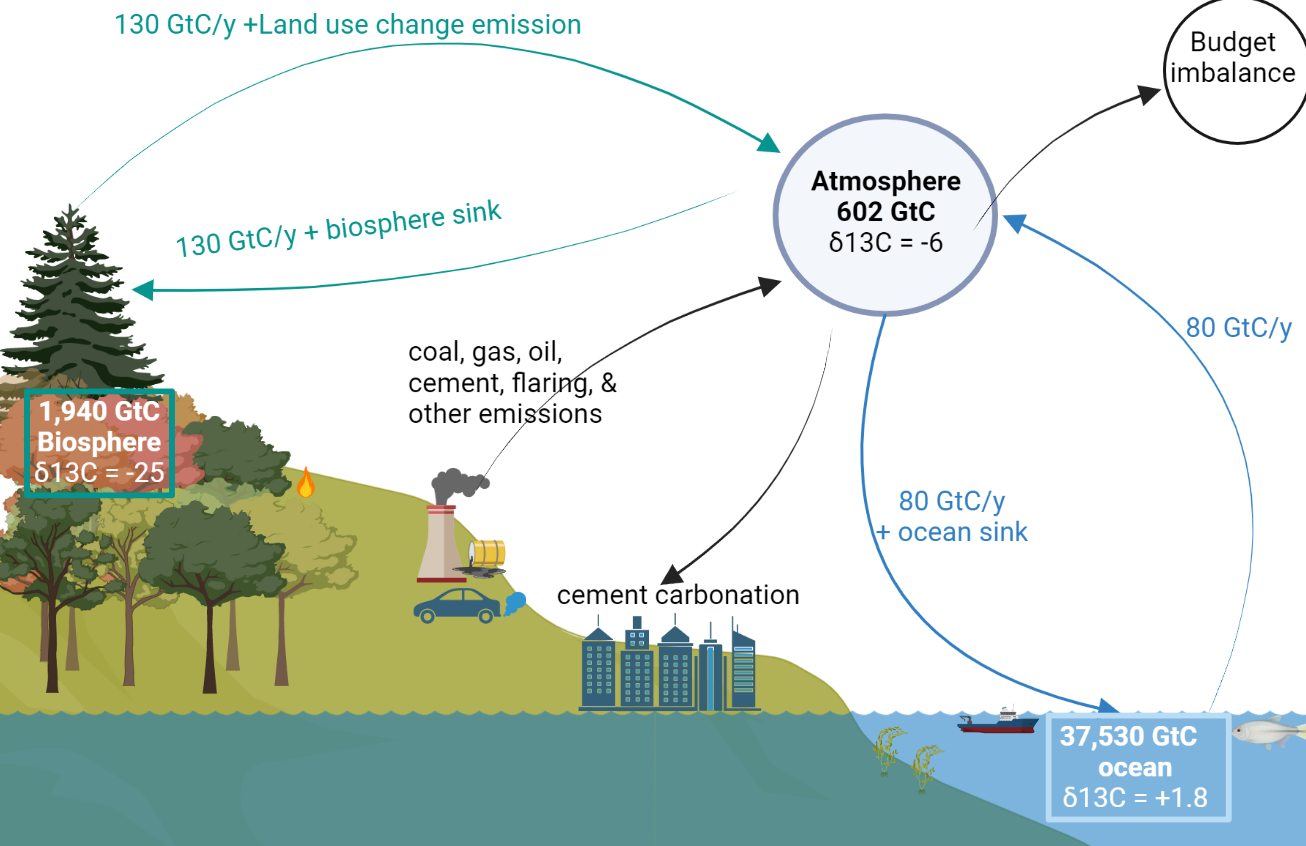


The sketch above is a simplified version of the Global Carbon Budget 2022 paper.

The paper and its supplementary links:

https://essd.copernicus.org/articles/14/4811/2022/ 

https://doi.org/10.18160/GCP-2022

I will use their estimation for the reservoirs & fluxes, 

so In the next code line I will import their data from 1850 till 2021


In [2]:
df = pd.read_csv('carbonbudgetfrom1850.csv',index_col='year')
time= df.index
df.columns

Index(['all_6_emissions_excluding_land_use_Change_emsissions', 'coal_emission',
       'oil_emission', 'gas_emission', 'cement_emission', 'flaring_emission',
       'other_emission', 'land_use_change_emission', 'atmospheric_growth',
       'ocean_sink', 'land_sink', 'cement_carbonation_sink',
       'budget_imbalance'],
      dtype='object')

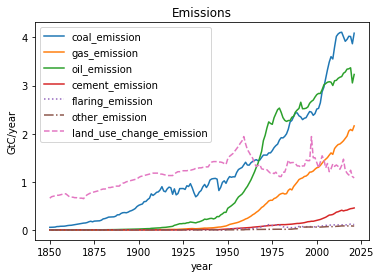

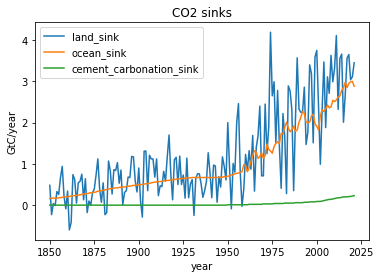

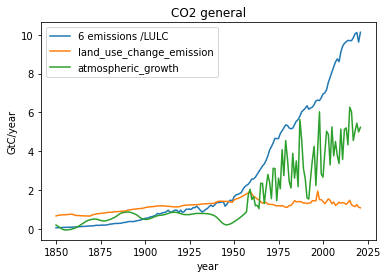

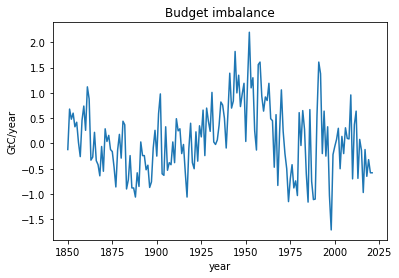

,all_6_emissions_excluding_land_use_Change_emsissions,coal_emission,oil_emission,gas_emission,cement_emission,flaring_emission,other_emission,land_use_change_emission,atmospheric_growth,ocean_sink,land_sink,cement_carbonation_sink,budget_imbalance
count,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,2.748882,1.268831,0.960757,0.403133,7.151119e-02,0.029283,0.015367,1.177674,1.589302,1.016744,1.213023,0.031047,0.076512
std,3.054918,1.119399,1.203052,0.604311,1.171714e-01,0.040000,0.026385,0.286818,1.633062,0.796047,1.111955,0.055736,0.693281
min,0.053738,0.053738,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.650000,-0.060000,0.160000,-0.600000,0.000000,-1.710000
25%,0.373167,0.359949,0.011322,0.002262,1.892500e-07,0.000000,0.000000,0.995000,0.500000,0.447500,0.397500,0.000000,-0.422500
50%,1.143882,0.897549,0.190764,0.032328,9.129356e-03,0.000000,0.000791,1.210000,0.780000,0.670000,0.845000,0.000000,0.035000
75%,5.162391,1.803743,2.274270,0.705516,1.080754e-01,0.064939,0.013584,1.362500,2.477500,1.510000,1.882500,0.040000,0.555000
max,10.132055,4.107946,3.369447,2.162071,4.564936e-01,0.119884,0.083690,1.940000,6.270000,3.000000,4.190000,0.230000,2.200000


In [3]:
# check what we have imported

# --------------Visual inspection--------------# 

#plotting the CO2 emission's fluxes
df.coal_emission.plot()
df.gas_emission.plot()
df.oil_emission.plot()
df.cement_emission.plot(linestyle='-')
df.flaring_emission.plot(linestyle=':')
df.other_emission.plot(linestyle='-.')
df.land_use_change_emission.plot(linestyle='--')
plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("Emissions")
plt.show()

#plotting the CO2 sinks
df.land_sink.plot()
df.ocean_sink.plot()
df.cement_carbonation_sink.plot()
plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("CO2 sinks")
plt.show()

#plotting the CO2 general
df.all_6_emissions_excluding_land_use_Change_emsissions.plot(label='6 emissions /LULC')
df.land_use_change_emission.plot()
df.atmospheric_growth.plot()
plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("CO2 general")
plt.show()


#plotting the Budget_imbalance
df.budget_imbalance.plot()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("Budget imbalance")
plt.show()

# --------------Statistical inspection--------------# 
df.describe()

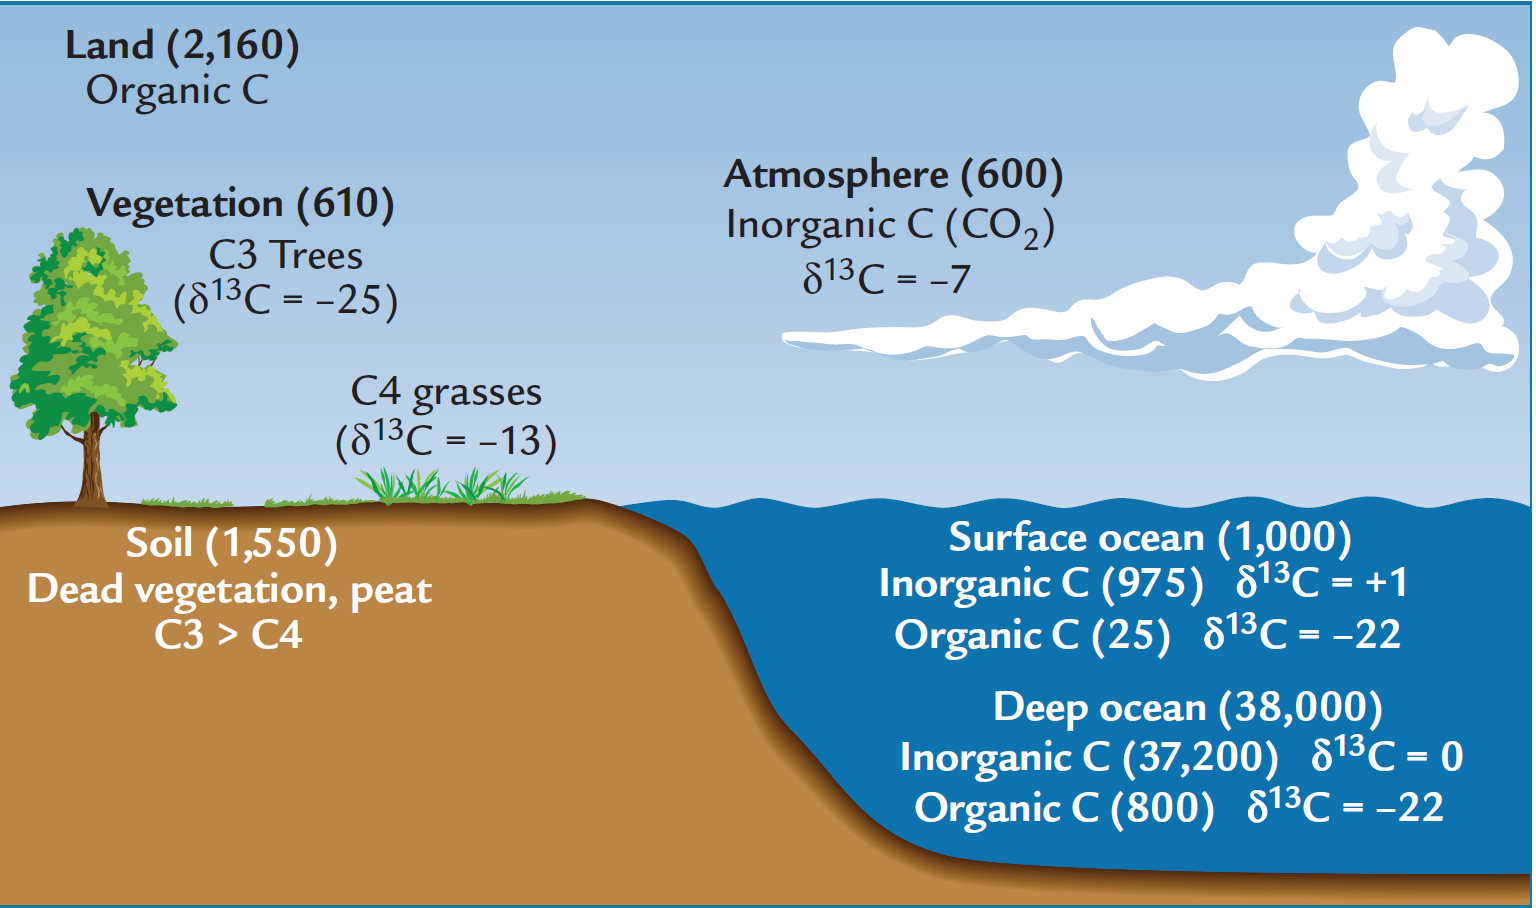

All fluxes have the d13C signature of its origin reservoir. Except for the flux from atmosphere to the biosphere because of the photosynthetic CO2 fixation **fractionation** as in

https://link.springer.com/chapter/10.1007/0-306-48137-5_17

Furthermore, the fractionation yields lower value in C3 vegetations like trees (~ d13C=-25), than the fractionation in C4 vegetation like grasses and some crops (~ d13C=-13). The later values token from william ruddiman book (Earth's climate, 2001) figure 11-5, the figure added above here

-In this model I will use the value of =(atmospherics value-**19**) as a value of the flux from atmosphere to biosphere


In [4]:
# let us establish the reservoirs & fluxes values:
# All units in  GtC/y for fluxes and  GtC for reservoirs
# All calculations for (C) carbon mass only. It is not for CO2

# -------------- Reservoirs size--------------#
# the initial size of C reservoir in ocean in the year 1850
# assume that the sum_of_DIC, marine biota, and OC = 37528 GtC
ocean = np.array([37528]) 

# the initial size of C reservoir in atmosphere
# assume 602 GtC in the year 1850
atmosphere = np.array([602])   

# the initial size of C reservoir in biosphere
# assume that the sum_of_soils and vegetation_Carbon is 2144 GtC
# Current:  vegeation + soils= 450+1700=2150 GtC according to the Golbal Carbon paper
biosphere = np.array([2144])    

# --------------The fluxes--------------#
# biosphere fluxes
from_biosphere_to_Atmosphere = np.array(130 + df.land_use_change_emission)
from_Atmosphere_to_biosphere = np.array(130 + df.land_sink)
# ocean fluxes
from_ocean_to_Atmosphere = np.repeat(80, 172)   # we repeat the same flux in all the loop of 172 year
from_Atmosphere_to_ocean = np.array(80 + df.ocean_sink )  

#  fossil fuel fluxes
# Make numpy array from the columns to to facilitate the loop
# for emissions
coal_emission	= np.array(df.coal_emission)
gas_emission	= np.array(df.gas_emission)
oil_emission	= np.array(df.oil_emission)
cement_emission	= np.array(df.cement_emission)
flaring_emission	= np.array(df.flaring_emission)
other_emission	= np.array(df.other_emission)
# and for the carbonation_sink &  budget_imbalance
cement_carbonation_sink = np.array(df.cement_carbonation_sink)
budget_imbalance =    np.array(df.budget_imbalance)


# --------------There are other fluxes that mix with the atmospheric carbon--------------#
# I need to consider that there is another 13C signatures from biomass burning, and another from wetland and termite according to:
#  (page 14 of the  https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf)
# also the “geo-CH4” as in https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL033623

# Natural weathering absorbs roughly 1.1 billion tons CO2 sink according to:
# https://www.pik-potsdam.de/en/news/latest-news/enhanced-weathering-of-rocks-can-help-to-suck-co2-out-of-the-air-2013-a-little but this is not in the Global Carbon Budget
# Moreover, The atmospheric CO2 concentration has increased and the mining activities increased as well. 
# I would expect that these increases results in more CO2 in the weathering/sink?

# -------------- δ13C values for the reservoirs--------------#
# help in the 3 needed values, more specifically in the ocean_13C

# all δ13C values in permill PDB Pee Dee Belemnite standard 
# δ13C of the three reservoirs of ocean, biosphere and atmosphere
atmosphere_13C = np.array([-6])   
biosphere_13C = np.array([-25])
# The biosphere_13C value of -25 based on the last figure in https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html

ocean_13C = np.array([-6.5]) 
# The ocean_13C value must be (+1.8) according to figure 2 and 3 of http://dx.doi.org/10.1029/2001GB001817
# Nevertheless, the value of -6.5 was the value that gave a good result in this model
# Maybe the assumption that the d13C of DIC is representative for all ocean carbon is not correct?
# I made this assumption after considering that the DIC is 53 times bigger than the OC and biota, according to the carbon budget paper figure:
# https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png 
# The ocean has OC and biota beside the DIC? Furthermore the riverine OC input.
# OC and marine biota have very low value according to figure 2 of the publication http://dx.doi.org/10.1016/j.earscirev.2005.10.003 
# I need to improve that and implement the value of each type of oceanic carbon. but how?

# Another point of consideration is the ocean needs thousands of years to mix so maybe I should limit the oceanic reservoir size to only the upper ocean?

# -------------- δ13C of the six fossil fluxes--------------#
# help in the 6 needed values
# NOAA website consider all fossil fuels as -28 in a simplification at 
# https://gml.noaa.gov/outreach/isotopes/c13tellsus.html

gas_13C  = -45.2
# It is very rough estimation because: for example for Gas there are three main types (conventional gas, shale gas, and coal gas) beside the extraction and the geological layer that difference
# The gas_13C value is an average of the natural gas/coal from:
# study database https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf    page 13, table5 
# I need to find the better value estimation of the fossil CH4 only

coal_13C = -24.1
oil_13C  = -30
# The coal_13C and  oil_13C obtained from Andres et al. 1994, page 8. 
# https://www.osti.gov/servlets/purl/10185357
cement_13C = 0.3
# The cement_13C obtained from Andres et al. 1994, page 9. 
# https://www.osti.gov/servlets/purl/10185357
flaring_13C = gas_13C  # I suggest it is the same
other_13C = -26 # I assume that this is the same as trees. The value of -26 token from:
# https://gml.noaa.gov/outreach/isotopes/c13tellsus.html


# The next line is just to run experimental model without or with high value of fossil fuel
# gas_13C= coal_13C= oil_13C= cement_13C= flaring_13C= other_13C =-120

In [5]:
# A loop of 172 steps (years) will be made to estimate the change in the Carbon reservoirs size first 
for i in range(172):
  # every step will calculate the size change of all three reservoirs
  ocean = np.append(ocean, ocean[i] + from_Atmosphere_to_ocean[i] - from_ocean_to_Atmosphere[i] )
  atmosphere = np.append(atmosphere, atmosphere[i] - from_Atmosphere_to_ocean[i] + from_ocean_to_Atmosphere[i] +
                         from_biosphere_to_Atmosphere[i] - from_Atmosphere_to_biosphere[i] -
                         cement_carbonation_sink[i]- budget_imbalance[i]+
                          coal_emission[i]+ gas_emission[i]+ oil_emission[i]+ 
                         cement_emission[i]+ flaring_emission[i]+ other_emission[i]) 
  biosphere = np.append(biosphere, biosphere[i] - from_biosphere_to_Atmosphere[i] + from_Atmosphere_to_biosphere[i])


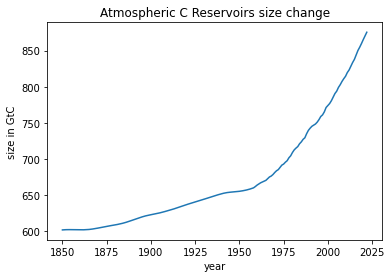

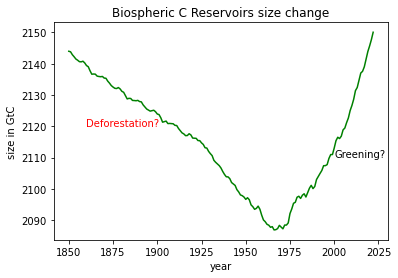

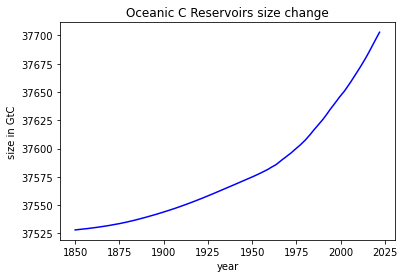

Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of  875 
 Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 2150 GtC. My model yields value of  2150 
Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 37,703 GtC. My model yields value of  37703


In [6]:
# tussen stapje ter controle
# Plot the change in these three reservoirs in time  

# first add extra one year to the time array because we forecasted a year in the last code
while len(time)==172:  # Add the year '2022' if you didn't added yet
  time = np.append(time,2022)

plt.plot(time, atmosphere, label='atmosphere')
plt.xlabel("year")
plt.ylabel("size in GtC")
plt.title("Atmospheric C Reservoirs size change")
plt.show()

plt.plot(time,biosphere, label='biosphere', color='g')
plt.xlabel("year")
plt.ylabel("size in GtC")
plt.title("Biospheric C Reservoirs size change")
plt.text(1860,2120, "Deforestation?", color='r')
plt.text(2000,2110, "Greening?")
plt.show()

plt.plot(time,ocean, label='ocean',color='b')
plt.xlabel("year")
plt.ylabel("size in GtC")
plt.title("Oceanic C Reservoirs size change")
plt.show()


# check the reservoirs size in 2021 according to my model and compare it with the carbon budget estimation
print('Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of ',round(atmosphere[-1]),'\n',  
      'Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 2150 GtC. My model yields value of ',round(biosphere[-1]), '\n'
      'Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 37,703 GtC. My model yields value of ',round(ocean[-1]) )

The biosphere absorbs ~29**±8**% of our **ANNUAL** emission  **during the last decade** according to Keeling & Graven; 2021 (https://doi.org/10.1146/annurev-environ-012220-125406) 

However, the biosphere figure above, shows that this CO2 sink is just a restoration of the original reservoir size. We almost reached the 1850 reservoir capacity. Do we have any extra **capacity**? Can the biosphere accommodate more carbon without amplification of the wildfire risk? In the next lines I will try to answer this question in fast calculation


In [7]:
greening= round(biosphere.max()- biosphere.min())
greening_prec = round((greening/biosphere.min())*100)

print('The total greening of',np.where(biosphere== biosphere.max())[0]-np.where(biosphere== biosphere.min())[0] ,'years\
, from the seventies till today is ',greening,'GtC,\
 This is a', greening_prec, '% increase in capacity' )

The total greening of [56] years, from the seventies till today is  63 GtC, This is a 3 % increase in capacity


 3 % increase of vegetation must not be an alarming problem for the biosphere capacity if the increase spreaded over all the globe and not concentrated in some forest. If it is  spreaded all over the world that will be ~half kilo of carbon in every single square meter on the land even on Sahara and tundra.

Although the model shows an increas in the vegetaion. The worldbank data shows **decrease** 3.3% of the Forest area in the last thirty years
https://data.worldbank.org/indicator/AG.LND.FRST.ZS

Other sources like the 
https://ourworldindata.org/forest-area
Which is based on the UN and other papers, indicates that The forest area was bigger in 1850 than today. In the Crabon Budget paper and this model both are the same which is anti intuition. 

In [ ]:
# back to the d13C

The balance equation for the atmosphere

δ13C X **new** atmosphere = (δ13C X **old** atmosphere)   +   (δ13C X fluxes)

With the **new** atmosphere I mean the atmosphere size in the next step

With **old** atmosphere I mean the atmosphere in the previous step


rearrange it

δ13C  = [(δ13C X old atmosphere)   +   (δ13C X flux)]    /  new  atmosphere




In [8]:
for i in range(172):
  atmosphere_13C = np.append(atmosphere_13C, (atmosphere[i]*atmosphere_13C[i] - 
                                              #the atmospher-ocean fluxes
                                              from_Atmosphere_to_ocean[i] * atmosphere_13C[i]  +\
                                              from_ocean_to_Atmosphere[i] * ocean_13C[i] +\
                                               #the atmospher-biosphere fluxes
                                              from_biosphere_to_Atmosphere[i] * biosphere_13C[i] -\
                                              from_Atmosphere_to_biosphere[i] * (atmosphere_13C[i] - 19)  +\
                                               #other fluxes
                                              cement_carbonation_sink[i] *cement_13C- budget_imbalance[i]* atmosphere_13C[i]  +
                                               #the fossil fuel & cement emission fluxes
                                              coal_emission[i]*coal_13C+ gas_emission[i]*gas_13C+ oil_emission[i]*oil_13C+ 
                                              cement_emission[i]*cement_13C+ flaring_emission[i]*flaring_13C+ other_emission[i]*other_13C)/
                                              atmosphere[i+1] )

  biosphere_13C = np.append(biosphere_13C, (biosphere[i]* biosphere_13C[i] - 
                                            from_biosphere_to_Atmosphere[i] * biosphere_13C[i] + 
                                            from_Atmosphere_to_biosphere[i] *(atmosphere_13C[i] - 19) )/biosphere[i+1] )
  ocean_13C = np.append(ocean_13C,( ocean[i]* ocean_13C[i] +
                                   from_Atmosphere_to_ocean[i] *atmosphere_13C[i] -
                                   from_ocean_to_Atmosphere[i] *ocean_13C[i])/ocean[i+1])    
print('Last Atmosphere 13C value is ',atmosphere_13C[-1],'\n','Last Biosphere 13C value is  ',biosphere_13C[-1], '\n','Last Ocean 13C value is  ',ocean_13C[-1])             

Last Atmosphere 13C value is  -8.111920293650138 
 Last Biosphere 13C value is   -26.77992396479256 
 Last Ocean 13C value is   -6.631356270409109


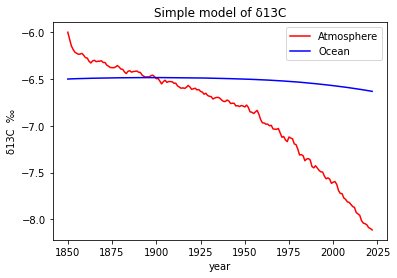

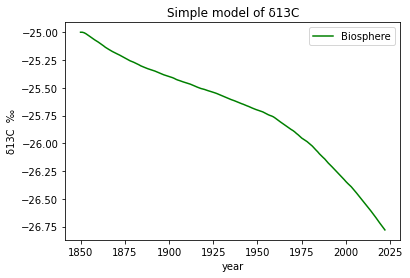

In [9]:
plt.plot(time, atmosphere_13C, label='Atmosphere',color='r')
plt.plot(time,ocean_13C, label='Ocean',color='b')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C")
plt.legend()
plt.show()

plt.plot(time,biosphere_13C, label='Biosphere',color='g')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C")
plt.legend()
plt.show()


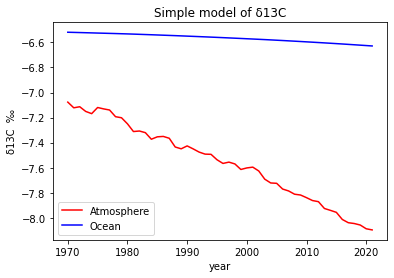

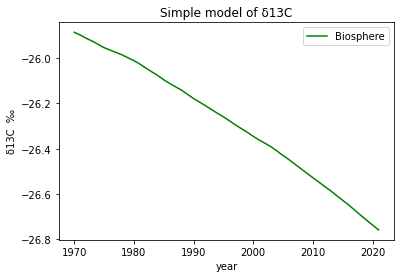

In [10]:
# zoom to the last 53 years

plt.plot(time[-53:-1], atmosphere_13C[-53:-1], label='Atmosphere',color='r')
plt.plot(time[-53:-1],ocean_13C[-53:-1], label='Ocean',color='b')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C")
plt.legend()
plt.show()

plt.plot(time[-53:-1],biosphere_13C[-53:-1], label='Biosphere',color='g')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C")
plt.legend()
plt.show()

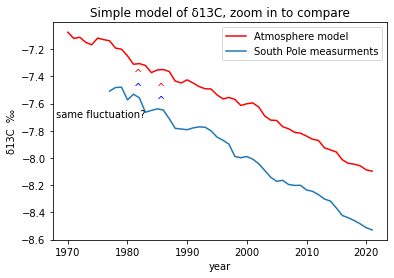

In [11]:
# Comparison with the south pole measurments from Scrippsco2 project
# Scrippsco2 data can be found at
# https://scrippsco2.ucsd.edu/
# https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html

# Annual average from South Pole station 
spo_time= ([1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
spo_13C= ([-7.509166667,-7.4825,-7.48,-7.573333333,-7.531666667,-7.558333333,-7.664166667,-7.650833333,-7.639166667,-7.6475,-7.711666667,-7.7825,-7.7875,-7.7925,-7.779166667,-7.771666667,-7.774166667,-7.8,-7.846666667,-7.87,-7.898333333,-7.989166667,-7.998333333,-7.989166667,-8.009166667,-8.0425,-8.091666667,-8.141666667,-8.171666667,-8.164166667,-8.195,-8.201666667,-8.200833333,-8.235,-8.245,-8.269166667,-8.301666667,-8.316666667,-8.3675,-8.4225,-8.439166667,-8.46,-8.484166667,-8.5125,-8.528571429])

plt.plot(time[-53:-1], atmosphere_13C[-53:-1], label='Atmosphere model',color='r')
plt.plot(spo_time, spo_13C, label='South Pole measurments')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C, zoom in to compare")

plt.text(1968,-7.7, "same fluctuation?")

plt.text(1981,-7.4, "^", color='r')
plt.text(1981,-7.5, "^", color='b')

plt.text(1985,-7.5, "^", color='r')
plt.text(1985,-7.6, "^", color='b')

plt.legend()
plt.show()

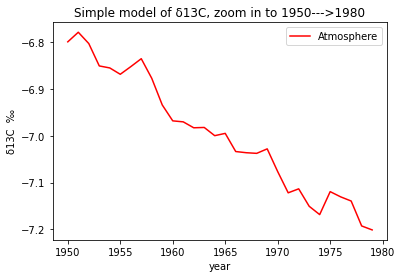

In [12]:
# Zoom in to the period when the land switch from source of C to a sink
# I will expect to see that in the d13C
# this is not visible because of the fossil fuel that mask the signal 

plt.plot(time[100:130], atmosphere_13C[100:130], label='Atmosphere',color='r')
#plt.plot(time[100:130],biosphere_13C[100:130], label='Biosphere',color='g')
#plt.plot(time[100:130],ocean_13C[100:130], label='Ocean',color='b')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C, zoom in to 1950--->1980")
plt.legend()
plt.show()